In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import numpy as np

In [5]:
data_benin  = pd.read_csv('/home/nibruad/Documents/Data Sets/data (1)/data/benin-malanville.csv')
data_sierraleones = pd.read_csv('/home/nibruad/Documents/Data Sets/data (1)/data/sierraleone-bumbuna.csv')
data_togo = pd.read_csv('/home/nibruad/Documents/Data Sets/data (1)/data/togo-dapaong_qc.csv')

 # perform correlation analysis for each dataset (Benin, Sierra Leone, and Togo):

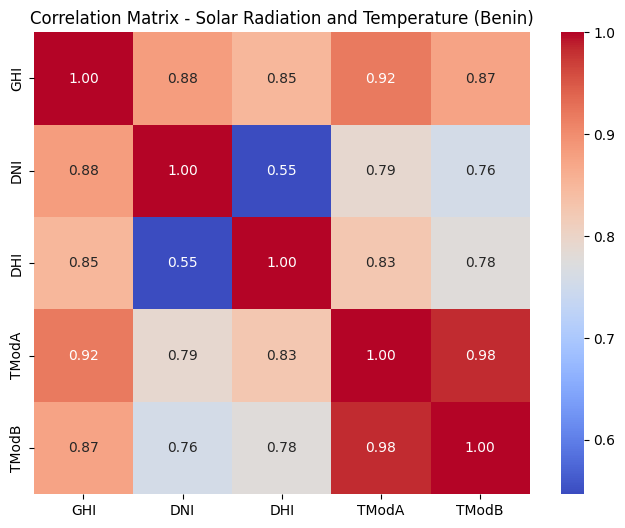

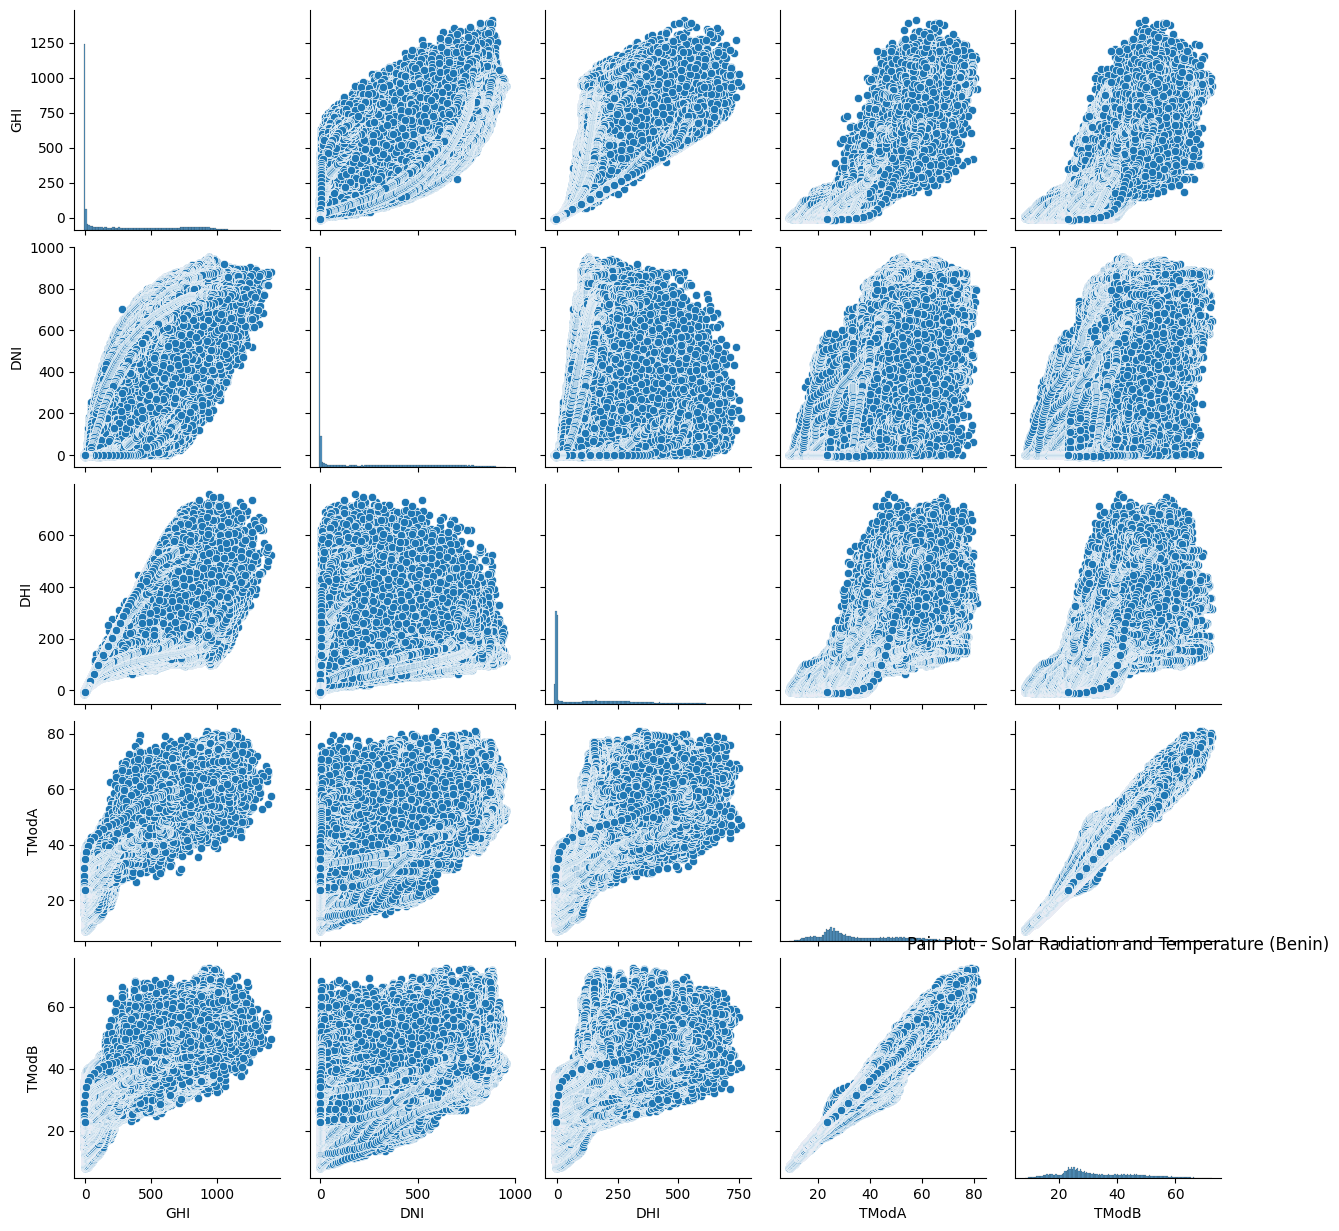

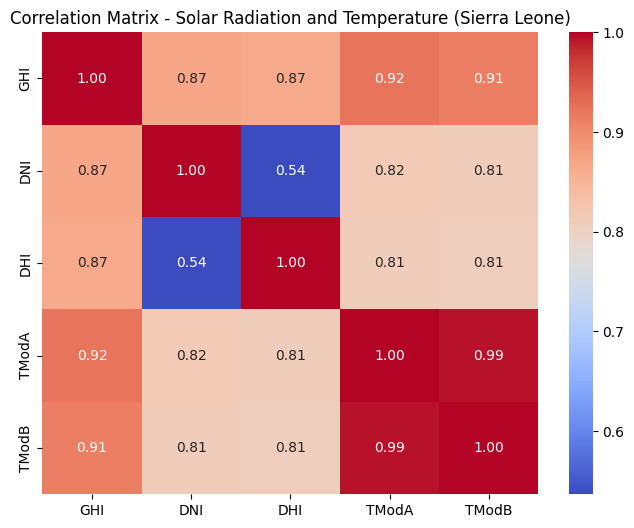

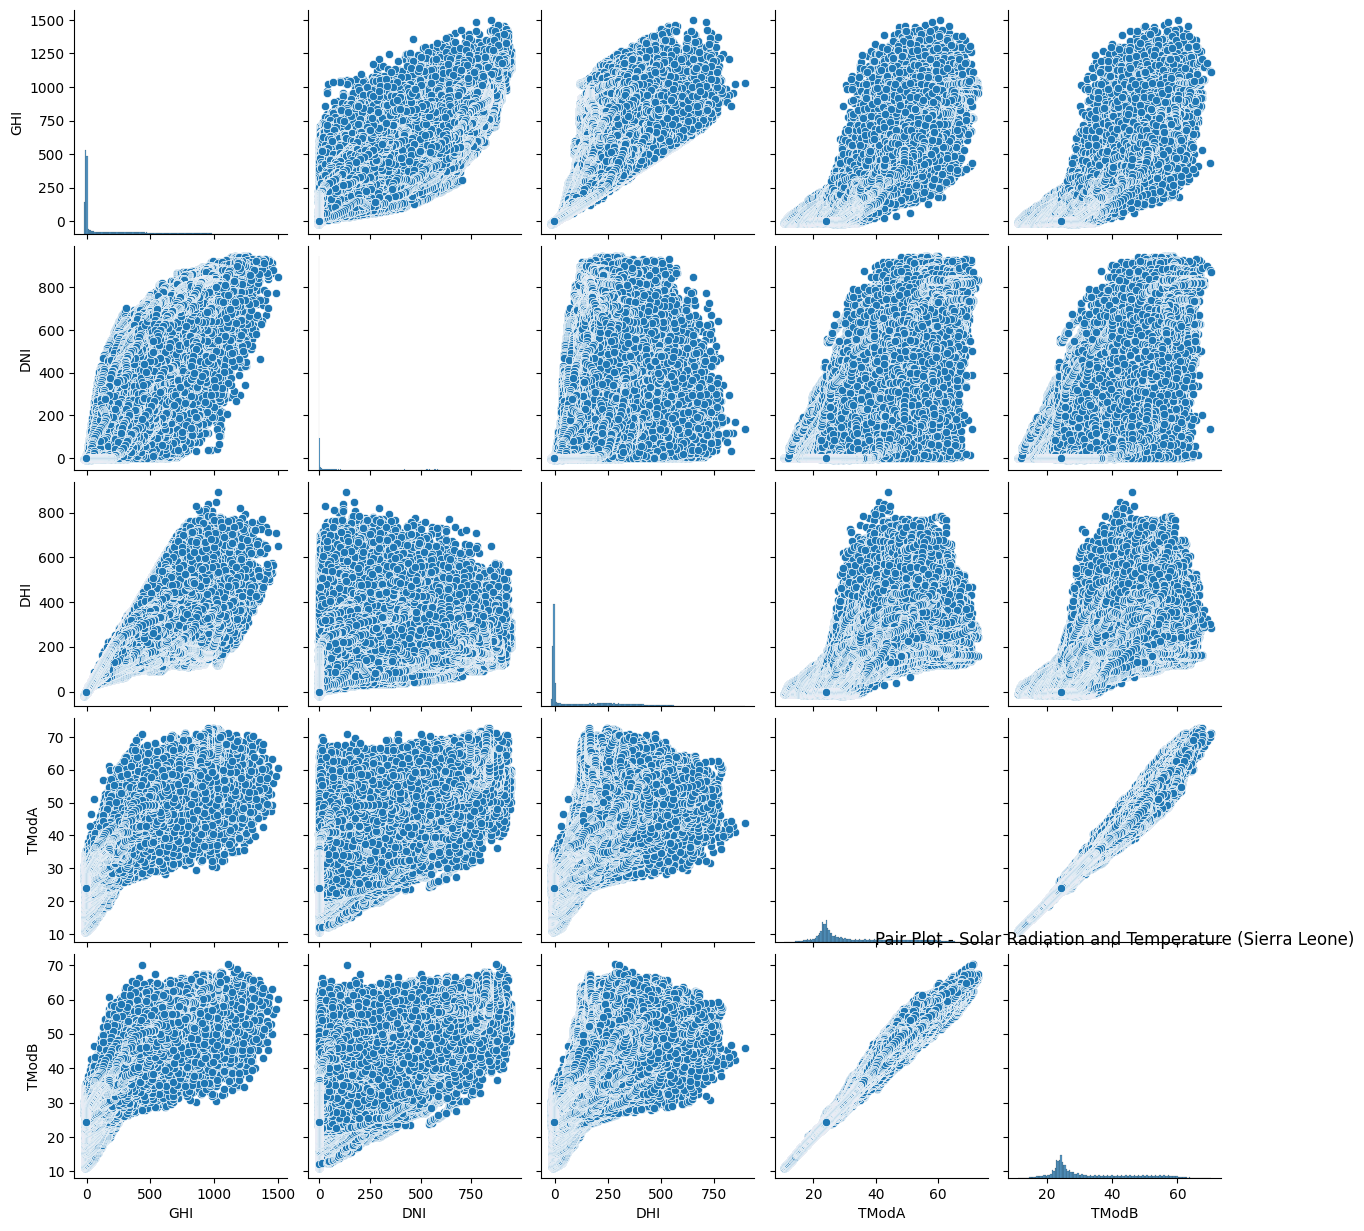

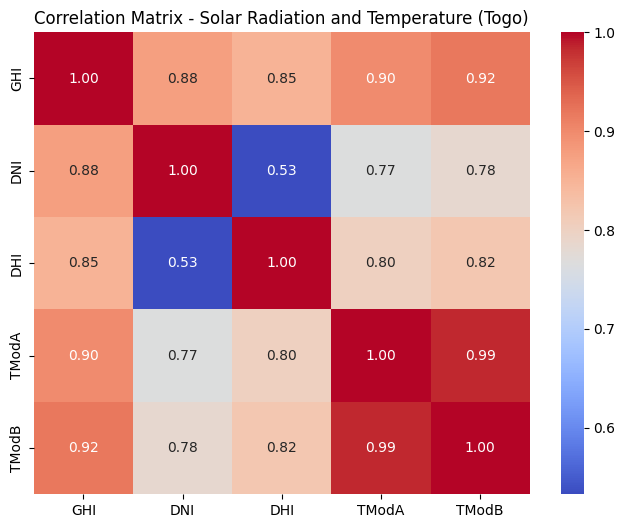

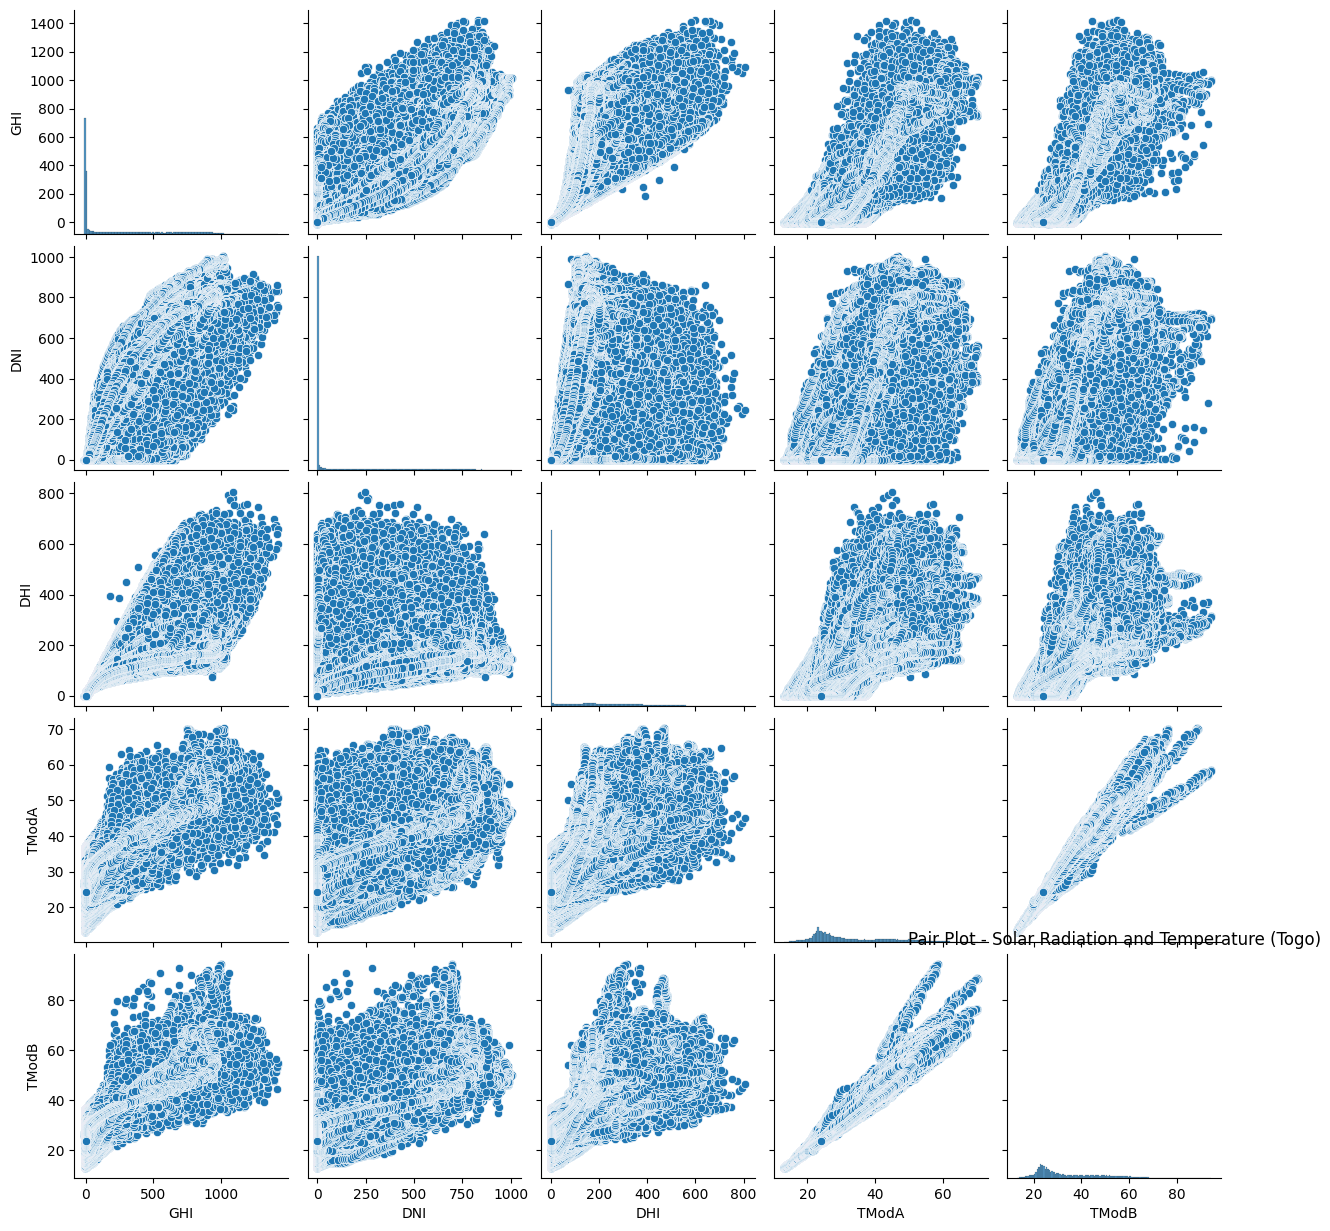

In [ ]:
datasets = [data_benin, data_sierraleones, data_togo]
dataset_names = ['Benin', 'Sierra Leone', 'Togo']

for i, dataset in enumerate(datasets):
    # Correlation between Solar Radiation and Temperature
    solar_temp_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
    correlation_matrix = dataset[solar_temp_cols].corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix - Solar Radiation and Temperature ({dataset_names[i]})')
    plt.show()

    sns.pairplot(dataset[solar_temp_cols])
    plt.title(f'Pair Plot - Solar Radiation and Temperature ({dataset_names[i]})')
    plt.show()

#  wind analysis using wind roses

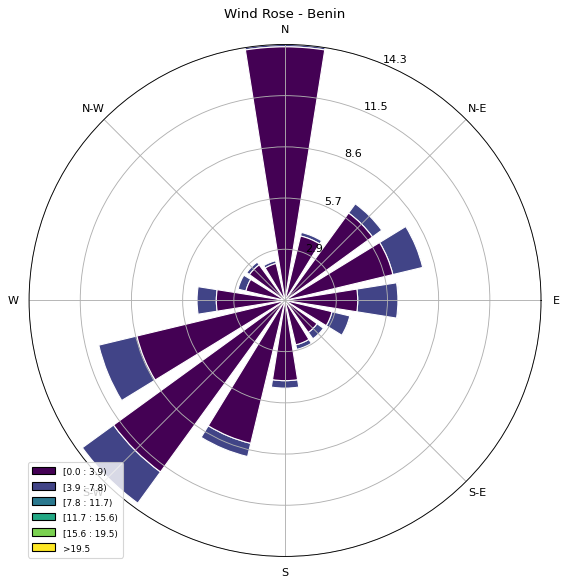

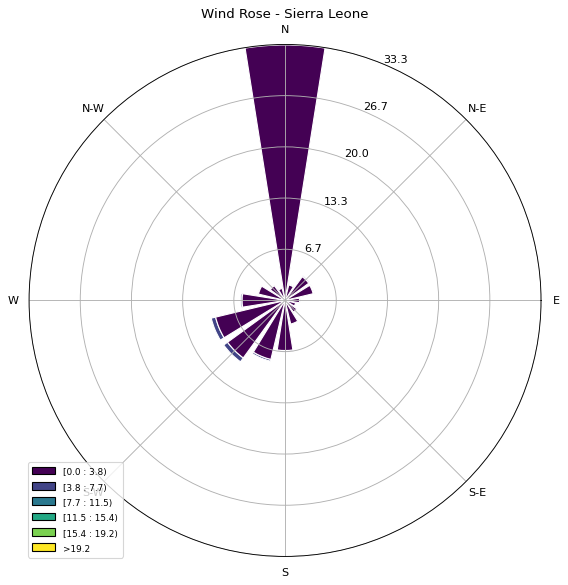

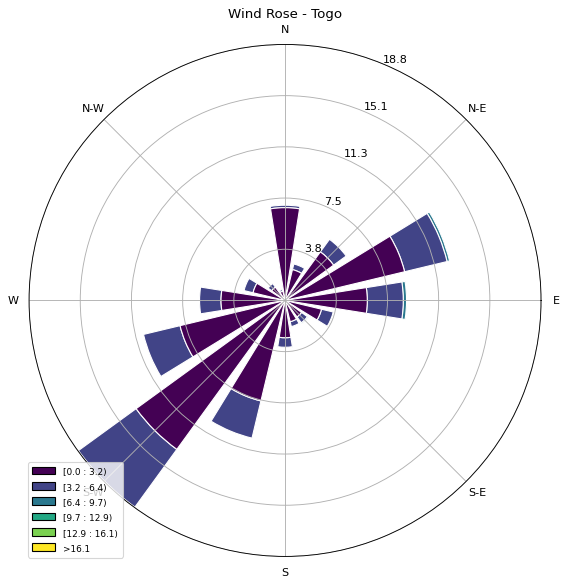

In [ ]:
from windrose import WindroseAxes
import matplotlib.cm as cm

datasets = [data_benin, data_sierraleones, data_togo]
dataset_names = ['Benin', 'Sierra Leone', 'Togo']

# Wind Analysis using Wind Roses
for i, dataset in enumerate(datasets):
    
    ax = WindroseAxes.from_ax()
    ax.bar(dataset['WD'], dataset['WS'], normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()
    plt.title(f'Wind Rose - {dataset_names[i]}')

# analyze the relationship between relative humidity (RH), temperature readings, and solar radiation.

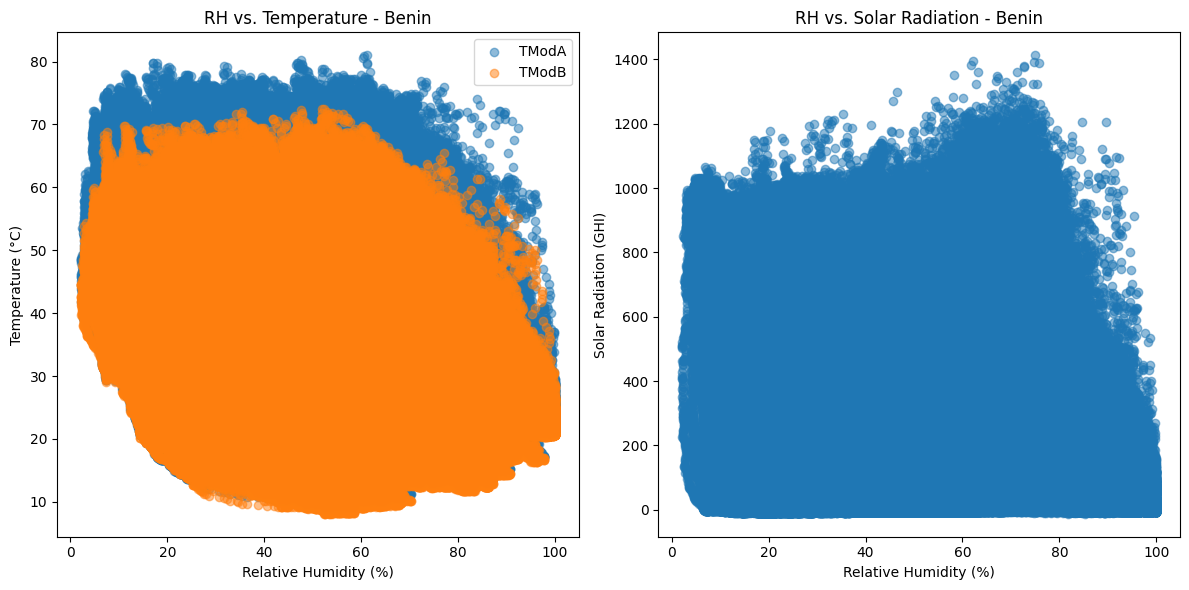

Correlation Matrix - Benin:
              RH     TModA     TModB       GHI
RH     1.000000 -0.343841 -0.319846 -0.360029
TModA -0.343841  1.000000  0.983443  0.920127
TModB -0.319846  0.983443  1.000000  0.874338
GHI   -0.360029  0.920127  0.874338  1.000000


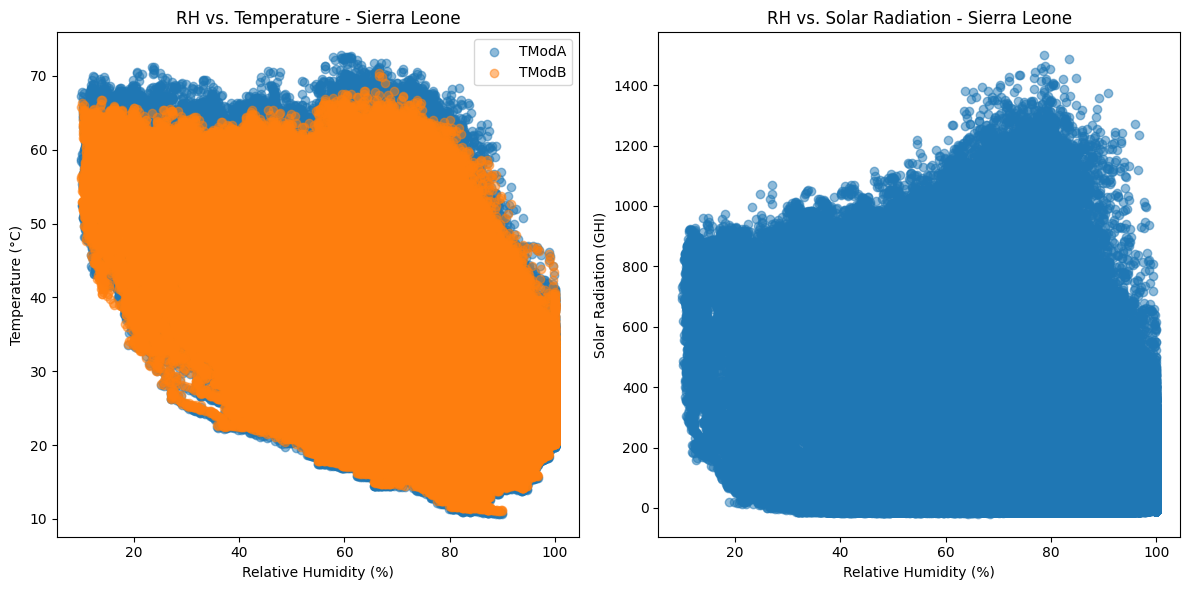

Correlation Matrix - Sierra Leone:
              RH     TModA     TModB       GHI
RH     1.000000 -0.688057 -0.698477 -0.546677
TModA -0.688057  1.000000  0.993228  0.923092
TModB -0.698477  0.993228  1.000000  0.912260
GHI   -0.546677  0.923092  0.912260  1.000000


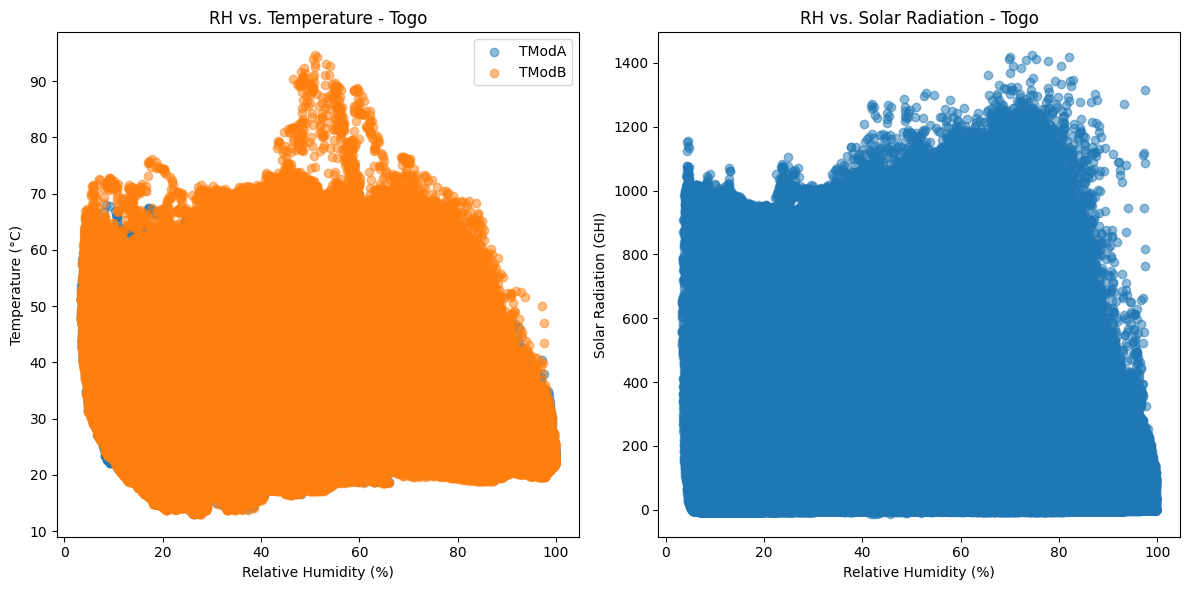

Correlation Matrix - Togo:
              RH     TModA     TModB       GHI
RH     1.000000 -0.244825 -0.224668 -0.258077
TModA -0.244825  1.000000  0.985069  0.898211
TModB -0.224668  0.985069  1.000000  0.919220
GHI   -0.258077  0.898211  0.919220  1.000000


In [19]:
! pip install pandas scipy
from pandas.plotting import scatter_matrix  

datasets = [data_benin, data_sierraleones, data_togo]
dataset_names = ['Benin', 'Sierra Leone', 'Togo']

# Temperature Analysis: RH vs. Temperature and Solar Radiation
for i, dataset in enumerate(datasets):
    # Scatter plots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # RH vs. Temperature (TModA and TModB)
    axes[0].scatter(dataset['RH'], dataset['TModA'], label='TModA', alpha=0.5)
    axes[0].scatter(dataset['RH'], dataset['TModB'], label='TModB', alpha=0.5)
    axes[0].set_xlabel('Relative Humidity (%)')
    axes[0].set_ylabel('Temperature (°C)')
    axes[0].set_title(f'RH vs. Temperature - {dataset_names[i]}')
    axes[0].legend()

    # RH vs. Solar Radiation (GHI)
    axes[1].scatter(dataset['RH'], dataset['GHI'], alpha=0.5)
    axes[1].set_xlabel('Relative Humidity (%)')
    axes[1].set_ylabel('Solar Radiation (GHI)')
    axes[1].set_title(f'RH vs. Solar Radiation - {dataset_names[i]}')

    plt.tight_layout()
    plt.show()

    # Correlation coefficients
    temp_cols = ['RH', 'TModA', 'TModB', 'GHI']
    correlation_matrix = dataset[temp_cols].corr()
    print(f"Correlation Matrix - {dataset_names[i]}:\n", correlation_matrix)

# createing histograms to visualize the frequency distribution of GHI, DNI, DHI, WS, and temperatures for each dataset.

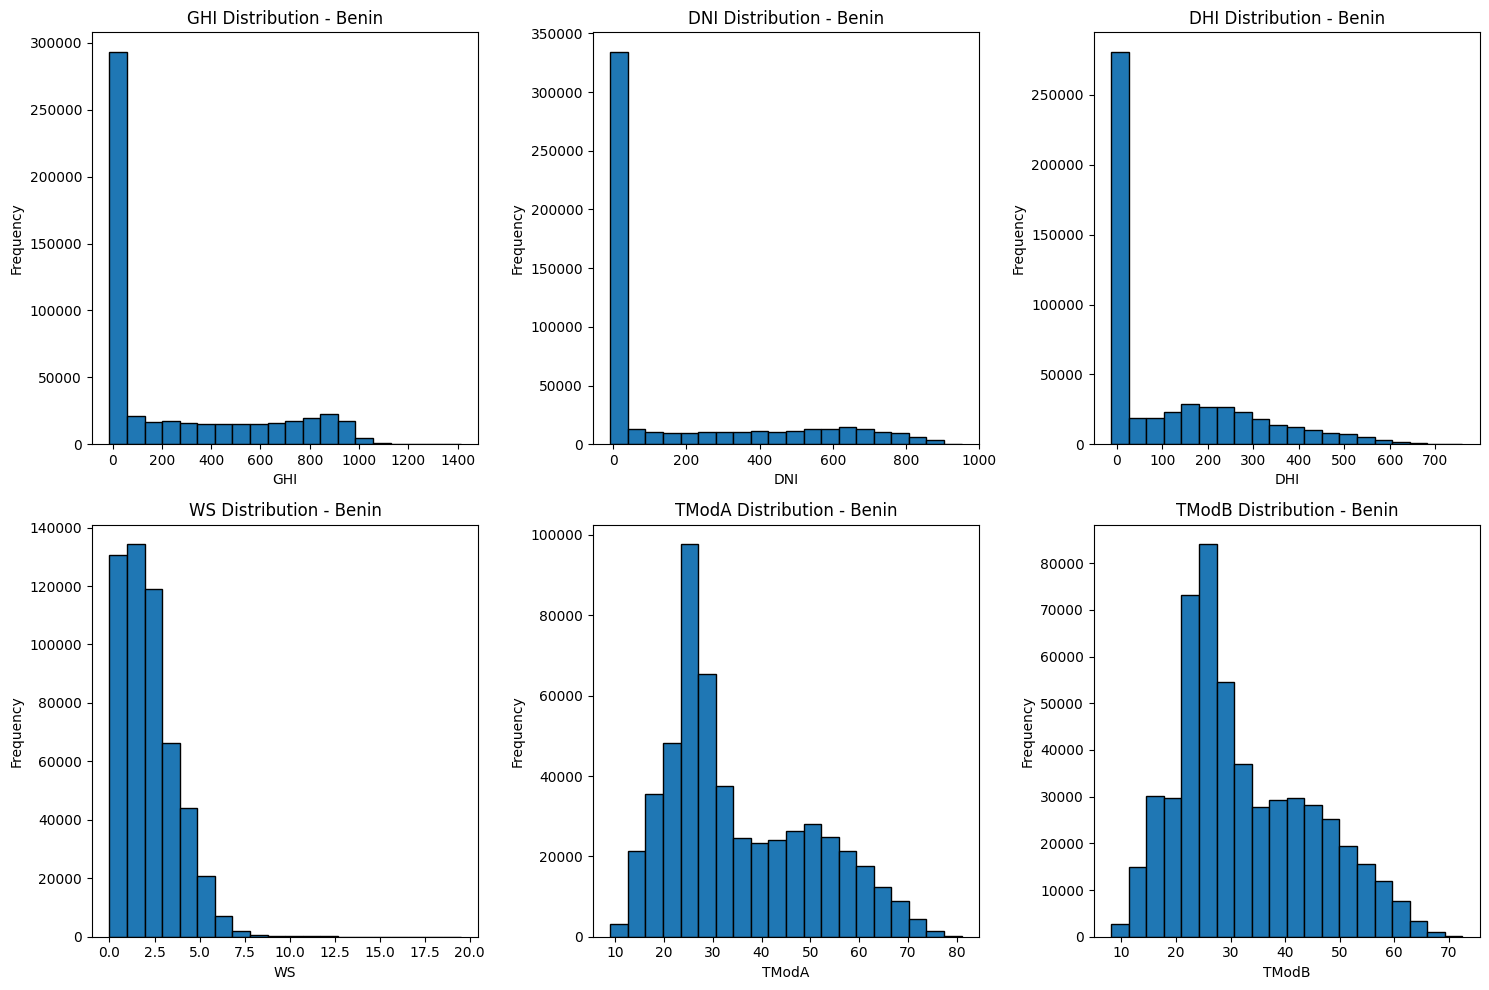

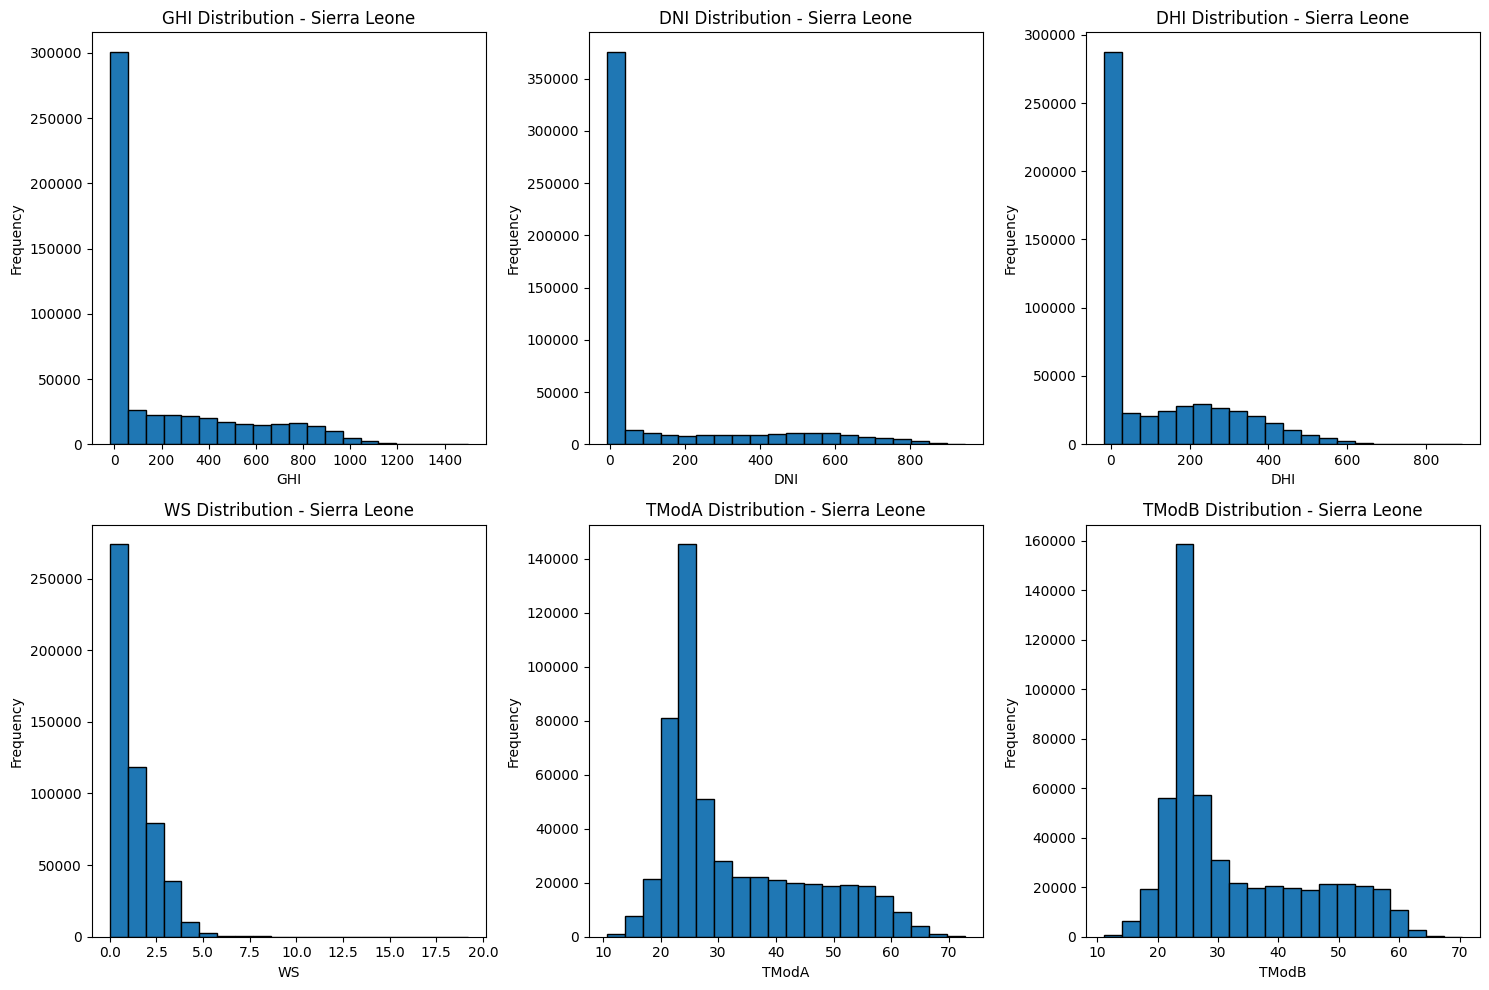

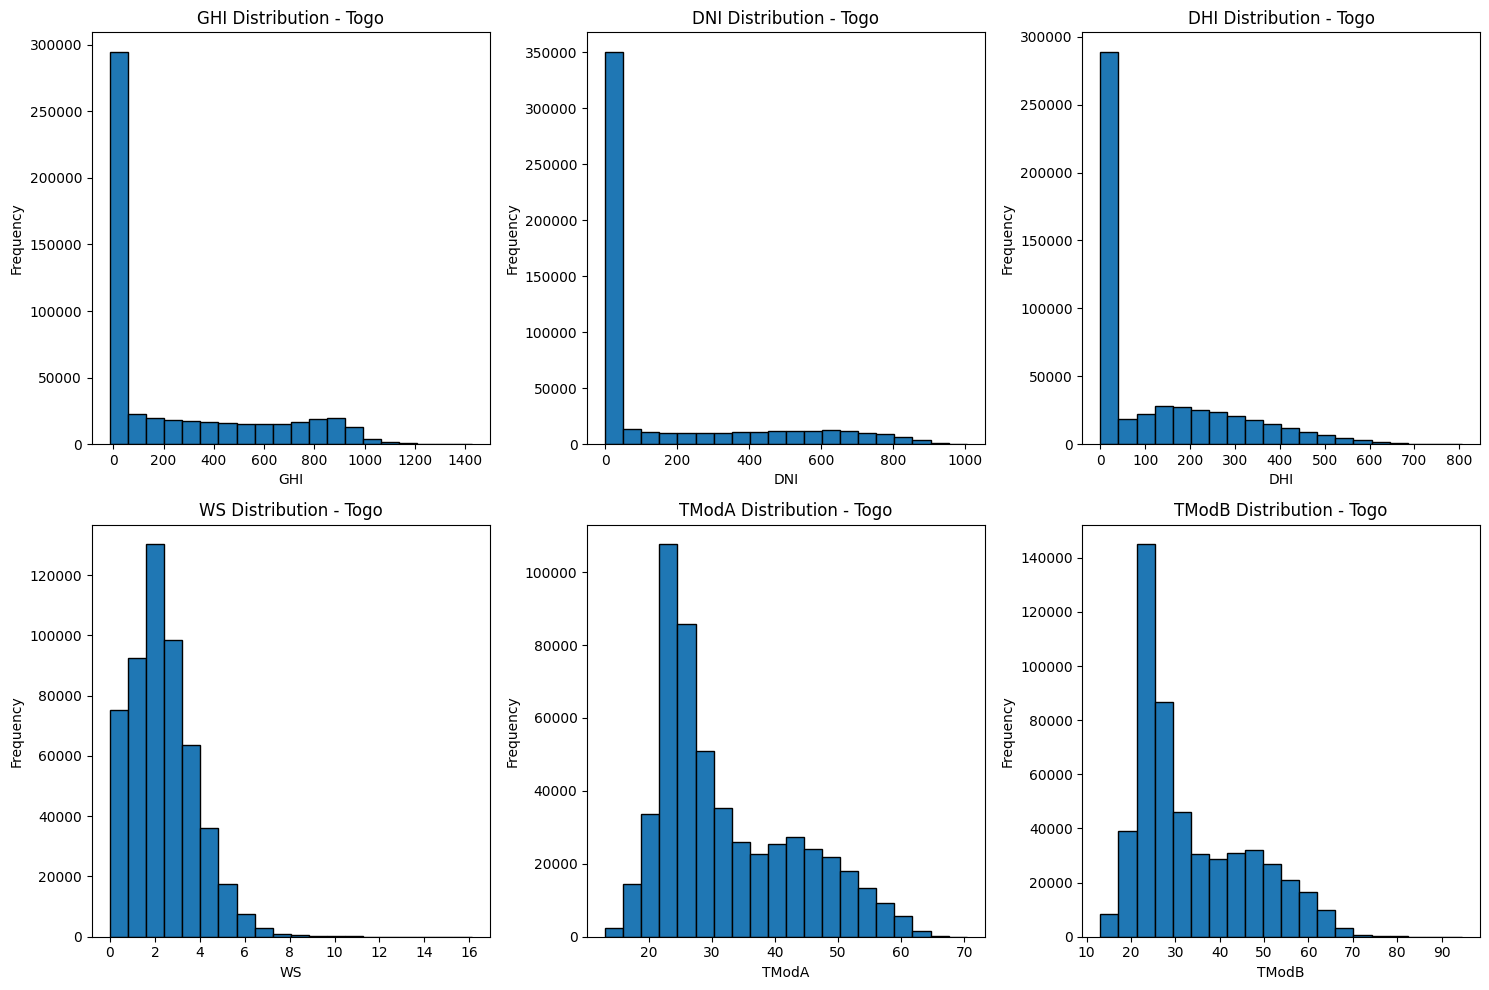

In [20]:
datasets = [data_benin, data_sierraleones, data_togo]
dataset_names = ['Benin', 'Sierra Leone', 'Togo']

# Histograms for GHI, DNI, DHI, WS, and Temperatures
hist_cols = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']

for i, dataset in enumerate(datasets):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
    axes = axes.flatten()  

    for j, col in enumerate(hist_cols):
        axes[j].hist(dataset[col], bins=20, edgecolor='black')  
        axes[j].set_title(f'{col} Distribution - {dataset_names[i]}')
        axes[j].set_xlabel(col)
        axes[j].set_ylabel('Frequency')

    plt.tight_layout()  
    plt.show()

# Z-Score Analysis

In [22]:
datasets = [data_benin, data_sierraleones, data_togo]
dataset_names = ['Benin', 'Sierra Leone', 'Togo']

# Z-Score Analysis
zscore_cols = ['GHI', 'DNI', 'DHI', 'WS', 'TModA', 'TModB']

for i, dataset in enumerate(datasets):
    for col in zscore_cols:
        # Calculate Z-scores
        dataset[col + '_zscore'] = (dataset[col] - dataset[col].mean()) / dataset[col].std()

        # Flag outliers (e.g., Z-score > 3 or Z-score < -3)
        outliers = dataset[(dataset[col + '_zscore'] > 3) | (dataset[col + '_zscore'] < -3)]

        # Print or further analyze outliers
        print(f"Outliers for {col} in {dataset_names[i]}:\n", outliers)

Outliers for GHI in Benin:
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
676     2021-08-09 11:17  1334.0  751.9  620.0  1267.3  1267.3  31.1  67.0   
849     2021-08-09 14:10  1253.0  714.8  552.5  1156.0  1155.0  31.0  64.2   
850     2021-08-09 14:11  1324.0  813.0  532.3  1218.0  1217.0  31.0  62.9   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
517777  2022-08-03 13:38  1268.0  652.5  612.1  1163.0  1150.0  30.1  70.7   
520659  2022-08-05 13:40  1280.0  778.5  497.2  1168.0  1161.0  29.0  70.3   
520696  2022-08-05 14:17  1244.0  745.2  530.4  1126.0  1118.0  30.8  64.3   
522074  2022-08-06 13:15  1262.0  772.4  475.8  1166.0  1153.0  31.1  66.0   
522075  2022-08-06 13:16  1289.0  758.1  519.2  1191.0  1179.0  31.4  65.9   

         WS  WSgust  WSstdev     WD